In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv


 # **Home Loan Prediction Machine Learning Project Report**

****Executive Summary****

****The Home Loan Prediction Machine Learning Project aims to develop a predictive model to assess the eligibility of applicants for home loans. The model utilizes historical data to make predictions, providing a valuable tool for financial institutions to streamline their loan approval process.****

****Project Overview****

****Objectives****
1. Develop a machine learning model to predict whether a loan application should be approved or denied.
2. Enhance efficiency in the loan approval process, minimizing manual efforts and optimizing decision-making.    

****Data Source****

The project uses a dataset containing information about and is describe in the form of fields given as followed:

1. LoanID: Which is nothing but the unique column in the data which every loan applicant is given.
2. Gender: Simply male and female in the list of applicants.
3. Married: married people are more reliable to pay loan than the unmarried.
4. Dependents: The more no. of dependents you are leaa able to pay bak the loan.
5. Education: UG people are less able to pay back the loan. More eductaion status will lead your more chances of payning back the loan.
6. Self_Employed: the category of freelancer and busissness come in the category of self_employed.
7. ApplicantIncome: The income of the applicant is is describe in this column.
8. CoapplicantIncome: The incomeof coappliacnt is decribe in this column so that it is easy to pay back the loan.
9. LoanAmount: Loan amount is the amount of loan.
10. Loan_Amount_Term: is the time period for which the loan has being given.
11. Credit_History: Credit history is a record of how a person handles money and debt, including credit card accounts and other loans.
12. Property_Area: describe the area for which the loan is approved here in the dataset it is Urban and Rural.
13. Loan Status: This describe the if Loan is approved to the applicant or not.

FIRST IMPORT THE DATASET

AND IMPORT THE IMPORTANT LIBRARIES

In [34]:
import numpy as np #Numpy is the library used for handing numeric values.
import pandas as pd #Pandas is the library for importing the dataset and forming the DataFrame
#Visualization library
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Perform some basic analysis on the data such as .Describe(), .shape(), .info().......

In [3]:
df.shape

(614, 13)

In [23]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.842199,1.037459,0.687296
std,0.386497,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


Check out the null values

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

we will now handle the missing values with help of basic statistical tools

Mean -> which gives the average of the outcomes.

Median -> which gives the central value for the column.

Mode -> which tells the most occur value for the column.

In [5]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True) 
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True) 
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True) 
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace = True)

In [38]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.842199
std,6109.041673,2926.248369,84.037468,64.428629,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [10]:
df = df.replace(to_replace='3+', value=4)
df['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
4     51
Name: count, dtype: int64

**DATA VISUALIZATION**

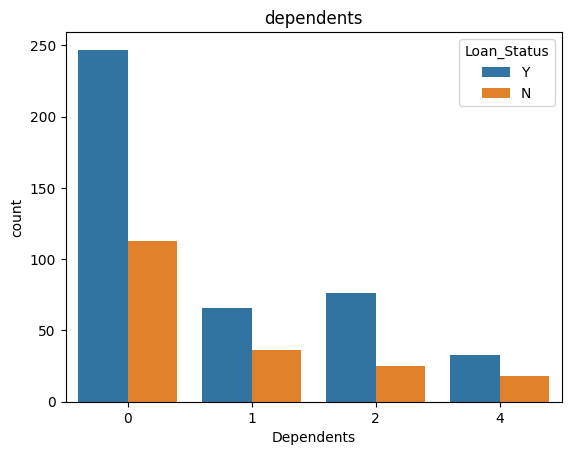

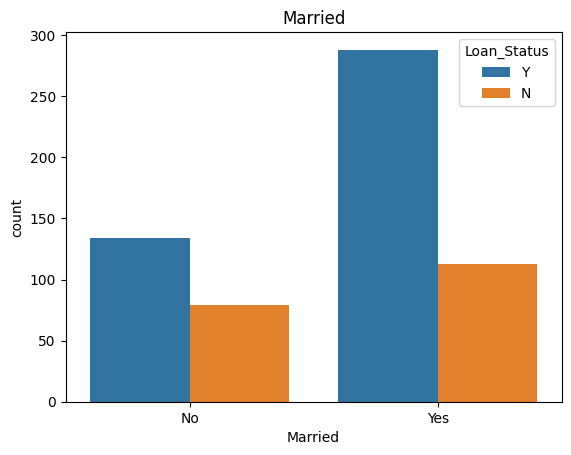

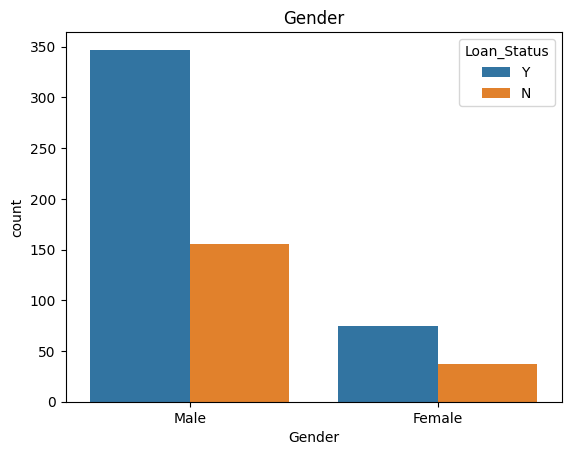

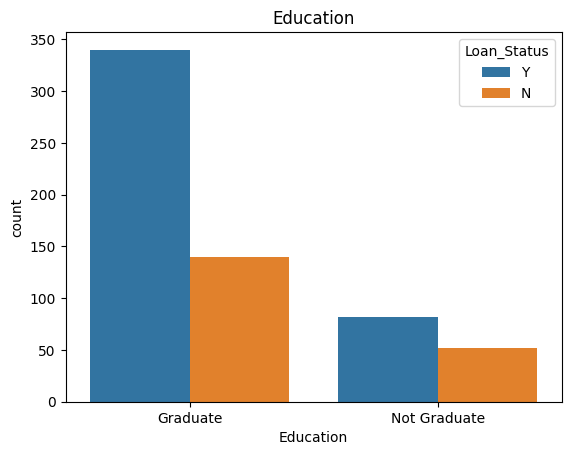

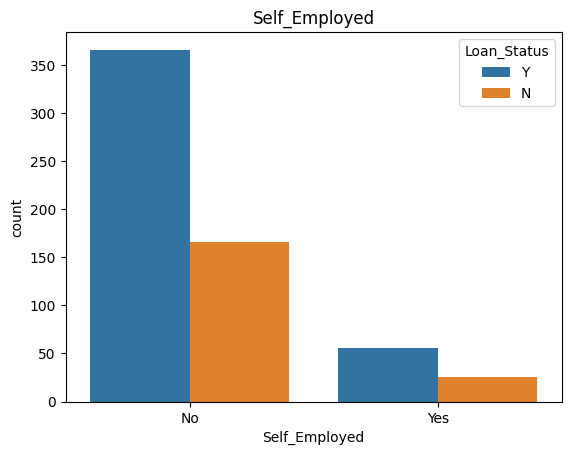

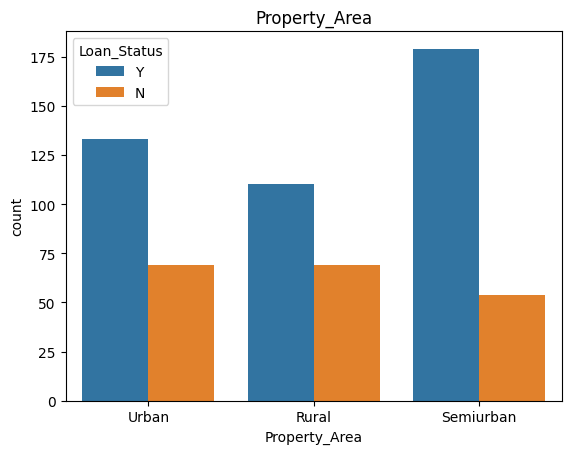

In [11]:
sns.countplot(x='Dependents', data = df, hue='Loan_Status')
plt.title('dependents')
plt.show()

sns.countplot(x='Married', data = df, hue='Loan_Status')
plt.title('Married')
plt.show()

sns.countplot(x='Gender', data = df, hue='Loan_Status')
plt.title('Gender')
plt.show()

sns.countplot(x='Education', data = df, hue='Loan_Status')
plt.title('Education')
plt.show()

sns.countplot(x='Self_Employed', data = df, hue='Loan_Status')
plt.title('Self_Employed')
plt.show()

sns.countplot(x='Property_Area', data = df, hue='Loan_Status')
plt.title('Property_Area')
plt.show()


Now replace the categorical columns to numerical columns by simply replacing to the numeric values

In [12]:
df.replace({'Married':{'No':0, 'Yes':1},
           'Gender':{'Male':1, 'Female':0},
           'Education':{'Graduate':1, 'Not Graduate':0},
           'Self_Employed':{'No':0,'Yes':1},
           'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2},
           'Loan_Status':{'Y':1, 'N':0}
           },inplace=True)

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


****Model Development****

1. Split the dataset into training and testing sets.
2. Select and implement machine learning algorithms.                                                                                 

In [14]:
x = df.drop(['Loan_Status', 'Loan_ID'], axis = 'columns')
y = df['Loan_Status']

In [15]:
print(x)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [18]:
print(x.shape, x_train.shape, x_test.shape)

(614, 11) (491, 11) (123, 11)


In [19]:
classifier = svm.SVC(kernel='linear')

In [20]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [21]:
x_train_pred = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_pred, y_train)

In [22]:
print('accuracy on training data:', training_data_accuracy)

accuracy on training data: 0.790224032586558
